In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

In [2]:
df = pd.read_excel("시도별 전출입 인구수.xlsx", engine='openpyxl', header=0)

# NaN값을 바로 앞의 행 데이터값으로 채운다.
df = df.fillna(method = 'ffill')

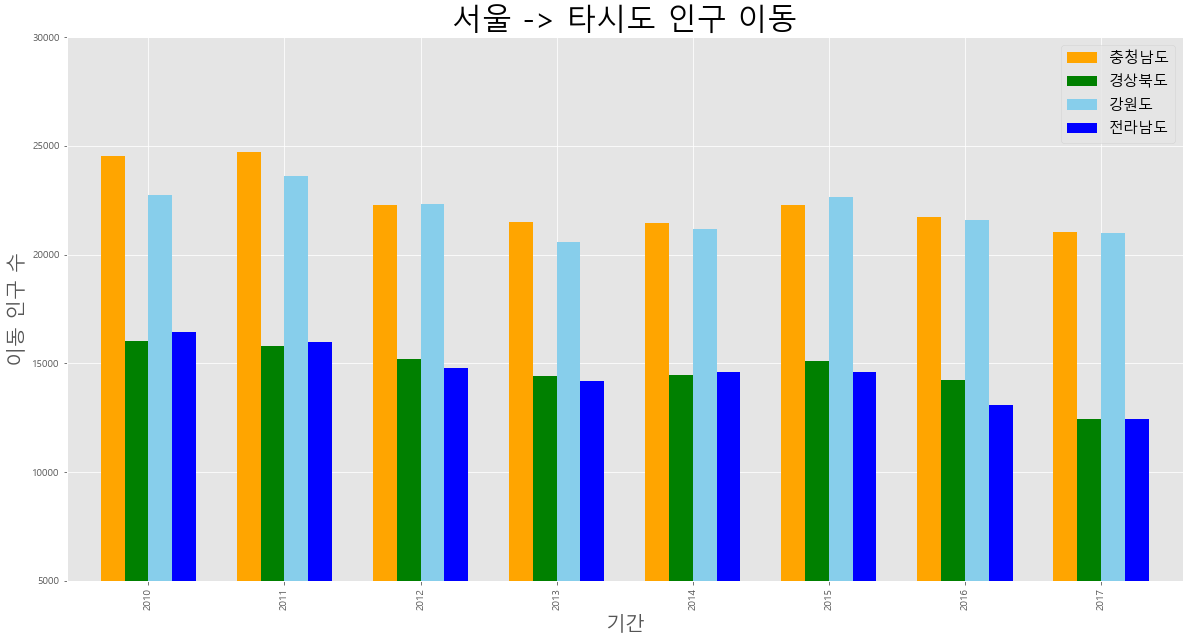

In [3]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1,inplace=True)
df_seoul.set_index('전입지',inplace=True) # 행 인덱스로 지정

# kind = 'bar' : 세로형 막대그래프(시계열)
col_years = list(map(str,range(2010,2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'], col_years]
df_4 = df_4.transpose()

plt.style.use('ggplot')
df_4.index = df_4.index.map(int)

df_4.plot(kind='bar',figsize=(20,10),width=0.7,
          color=['orange','green','skyblue','blue'])

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구 수', size=20)
plt.ylim(5000,30000)
plt.legend(loc='best',fontsize=15)
plt.show()

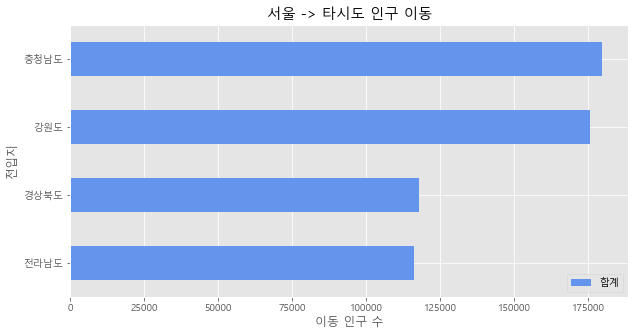

In [4]:
# kind = 'barh' : 가로형 막대그래프 (각 변수 사이 값의 크기 차이 설명)
col_years = list(map(str,range(2010,2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]

# 2010-2017년 이동 인구 수를 합계하여 새로운 열로 추가
df_4['합계'] = df_4.sum(axis=1)
df_total = df_4[['합계']].sort_values(by='합계', ascending=True)

plt.style.use('ggplot')
df_total.plot(kind='barh', color='cornflowerblue',width=0.5, figsize=(10,5))
plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')
plt.show()

<ipython-input-5-d1ac78219cd1>:4: FutureWarning: convert_float is deprecated and will be removed in a future version
  df = pd.read_excel('남북한발전전력량.xlsx',engine='openpyxl',convert_float=True)


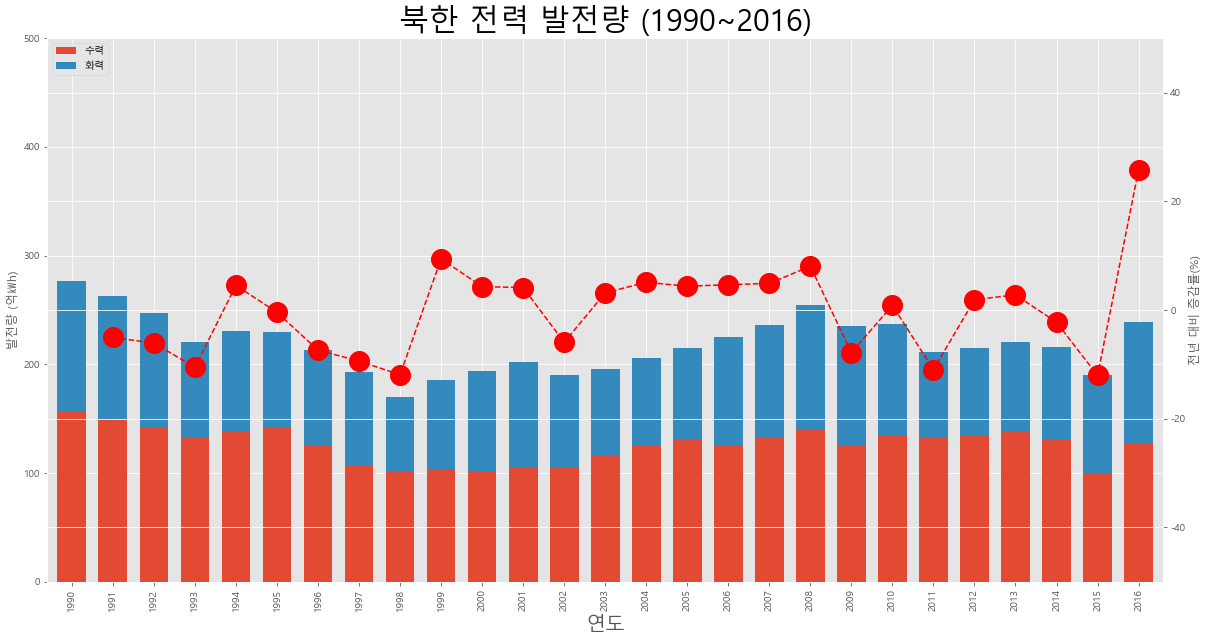

In [5]:
# 2축 그래프 그리기
plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력
df = pd.read_excel('남북한발전전력량.xlsx',engine='openpyxl',convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)',axis='columns',inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T

# 증감률(변동률) 계산
df = df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감률'] = ((df['총발전량']/df['총발전량 - 1년'])-1)*100

# 2축 그래프 그리기
ax1 = df[['수력','화력']].plot(kind='bar',figsize=(20,10),width=0.7,stacked=True)
ax2 = ax1.twinx() # 쌍둥이 객체 
ax2.plot(df.index, df.증감률, ls='--', marker='o', markersize=20,
         color='red',label='전년대비 증감률(%)')

ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량 (억㎾h)')
ax2.set_ylabel('전년 대비 증감률(%)')

plt.title('북한 전력 발전량 (1990~2016)', size=30)
ax1.legend(loc='upper left')
plt.show()